In [1]:
from utils import runwrite
import matplotlib.pyplot as plt

# target.py

In [2]:
%%runwrite ../timegym/target.py

import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame(np.random.normal(size=1000), columns=['target'], 
                  index=pd.date_range('2012-12-12', periods=1000))
df

,target
2012-12-12,-0.493436
2012-12-13,-0.262520
2012-12-14,0.281611
2012-12-15,-1.271695
2012-12-16,0.713204
...,...
2015-09-03,0.859353
2015-09-04,1.608761
2015-09-05,0.744984
2015-09-06,-0.046160


# Logarithm

In [ ]:
# TODO

# Box-Cox

In [ ]:
# TODO

# Differencing

In [10]:
%%runwrite -a ../timegym/target.py

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

def fractional_weights(d, lags):
    # https://gist.github.com/skuttruf/fb82807ab0400fba51c344313eb43466
    # return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w = [1]    
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    return np.array(w).reshape(-1,1) 

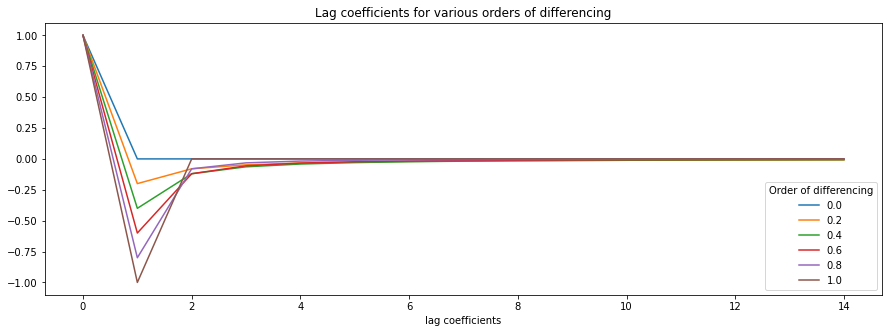

In [11]:
lags = 15
weights=pd.DataFrame(np.zeros((lags, 6)))
interval=np.linspace(0,1,weights.shape[1])
for i, diff_order in enumerate(interval):
    weights[i]=fractional_weights(diff_order, lags)
weights.columns = [round(x,2) for x in interval]
weights.plot(figsize=(15,5))
plt.legend(title='Order of differencing', loc='lower right')
plt.title('Lag coefficients for various orders of differencing')
plt.xlabel('lag coefficients');

In [12]:
%%runwrite -a ../timegym/target.py

def fractional_differencing(series, order:float, fractional_coefficients:int):
    # https://gist.github.com/skuttruf/fb82807ab0400fba51c344313eb43466
    assert order < fractional_coefficients, 'Accepting real orders order up to lag_cutoff coefficients'
    weights = fractional_weights(order, fractional_coefficients)
    res = 0
    for k in range(fractional_coefficients):
        res += weights[k] * series.shift(k).fillna(0)
    return res[fractional_coefficients:] 
    

def differencing(series, order=1, fractional_coefficients=10):
    # vanilla differencing
    if type(order) is int:
        return series.diff(order).iloc[order:]
    elif order.is_integer():
        return series.diff(int(order)).iloc[order:]
    # fractional differencing
    else:
        return fractional_differencing(series, order, fractional_coefficients)

In [13]:
differencing(df, order=1)

,target
2012-12-13,0.230916
2012-12-14,0.544132
2012-12-15,-1.553306
2012-12-16,1.984899
2012-12-17,-0.756637
...,...
2015-09-03,-0.478901
2015-09-04,0.749408
2015-09-05,-0.863777
2015-09-06,-0.791144


In [14]:
differencing(df, order=0.5)

,target
2012-12-22,-0.047271
2012-12-23,-0.665273
2012-12-24,1.178697
2012-12-25,-1.229040
2012-12-26,0.689960
...,...
2015-09-03,0.209311
2015-09-04,1.026919
2015-09-05,-0.238255
2015-09-06,-0.702476


# Slope of the trend

In [ ]:
# TODO includes smoothing + differencing

# Acceleration of the trend

In [2]:
# TODO the derivative of slope

# Jerk of the trend

In [ ]:
# TODO the derivative of acceleration

# Seasonality

In [ ]:
# TODO seasonality periods, and respective weights

# Cycles

In [ ]:
# TODO cycles' mean signals, max amplitude, and min amplitude.
# When the signal is near a signals' max amplitude or min amplitude, there's a good chance of reversal.
# Think bollinger bands, RSI, etc
# Think that a cycle can be represented similar to a circumference, but this circumference is not a line, but a fog. 
# The state of the cycle is not always moving forward, it can be nonlinear in its course (think Jeremy Beremys), until reaching the starting point again.

# Amount of uncertainty

In [ ]:
# TODO standard deviation, iterquartile range, difference between .99 and .01 quantiles